In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer

In [ ]:
# Mount Google Drive
# This is required if you are using Google Colab
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def save_transformed_data(df, columns_to_transform, output_path):
    """
    Apply quantile transformation to specified columns and save results to Excel.

    Parameters:
    df (pandas.DataFrame): Input dataframe with original data
    columns_to_transform (dict): Dictionary mapping column letters to column names
    output_path (str): Path where to save the Excel file

    Returns:
    pandas.DataFrame: DataFrame with both original and transformed columns
    """

    # Create a copy of the dataframe to avoid modifying the original
    result_df = df.copy()

    # Initialize the QuantileTransformer
    qt = QuantileTransformer(output_distribution='normal', random_state=42)

    # Apply transformation to each column
    for col_name in columns_to_transform.values():
        # Reshape the data for transformation
        data_reshaped = df[col_name].values.reshape(-1, 1)
        # Apply transformation and create new column
        result_df[f'{col_name}_quantile'] = qt.fit_transform(data_reshaped)

    # Save to Excel
    result_df.to_excel(output_path, index=False)
    print(f"Data saved successfully to {output_path}")

    return result_df

# Define the columns to transform for corporate customers

columns_to_transform = {
    'E': 'avg_monthly_cash_transaction_amount',
    'F': 'avg_monthly_cash_transaction_count',
    'G': 'sum_monthly_cash_transaction_amount',
    'H': 'max_monthly_cash_transaction_amount',
    'I': 'avg_monthly_cross_border_transaction_amount',
    'J': 'avg_monthly_cross_border_transaction_count',
    'K': 'sum_monthly_cross_border_transaction_amount',
    'L': 'max_monthly_cross_border_transaction_amount'
}

# Retail columns to transform

# Read the original data
df = pd.read_excel('/dataset.xlsx') #define the path to the dataset

# Define output path in Google Drive
output_path = '/output.xlsx' #define the path to save the output

# Apply transformation and save
transformed_df = save_transformed_data(df, columns_to_transform, output_path)

# Print first few rows of the transformed data
print("\nFirst few rows of the transformed data:")
print(transformed_df.head())

# Print summary of transformations
print("\nColumns in the output file:")
for col in transformed_df.columns:
    print(f"- {col}")

In [ ]:
The later part draws the histograms of the normalised features. Can be called separately without first applying the transform, hence the input file is passed here again.

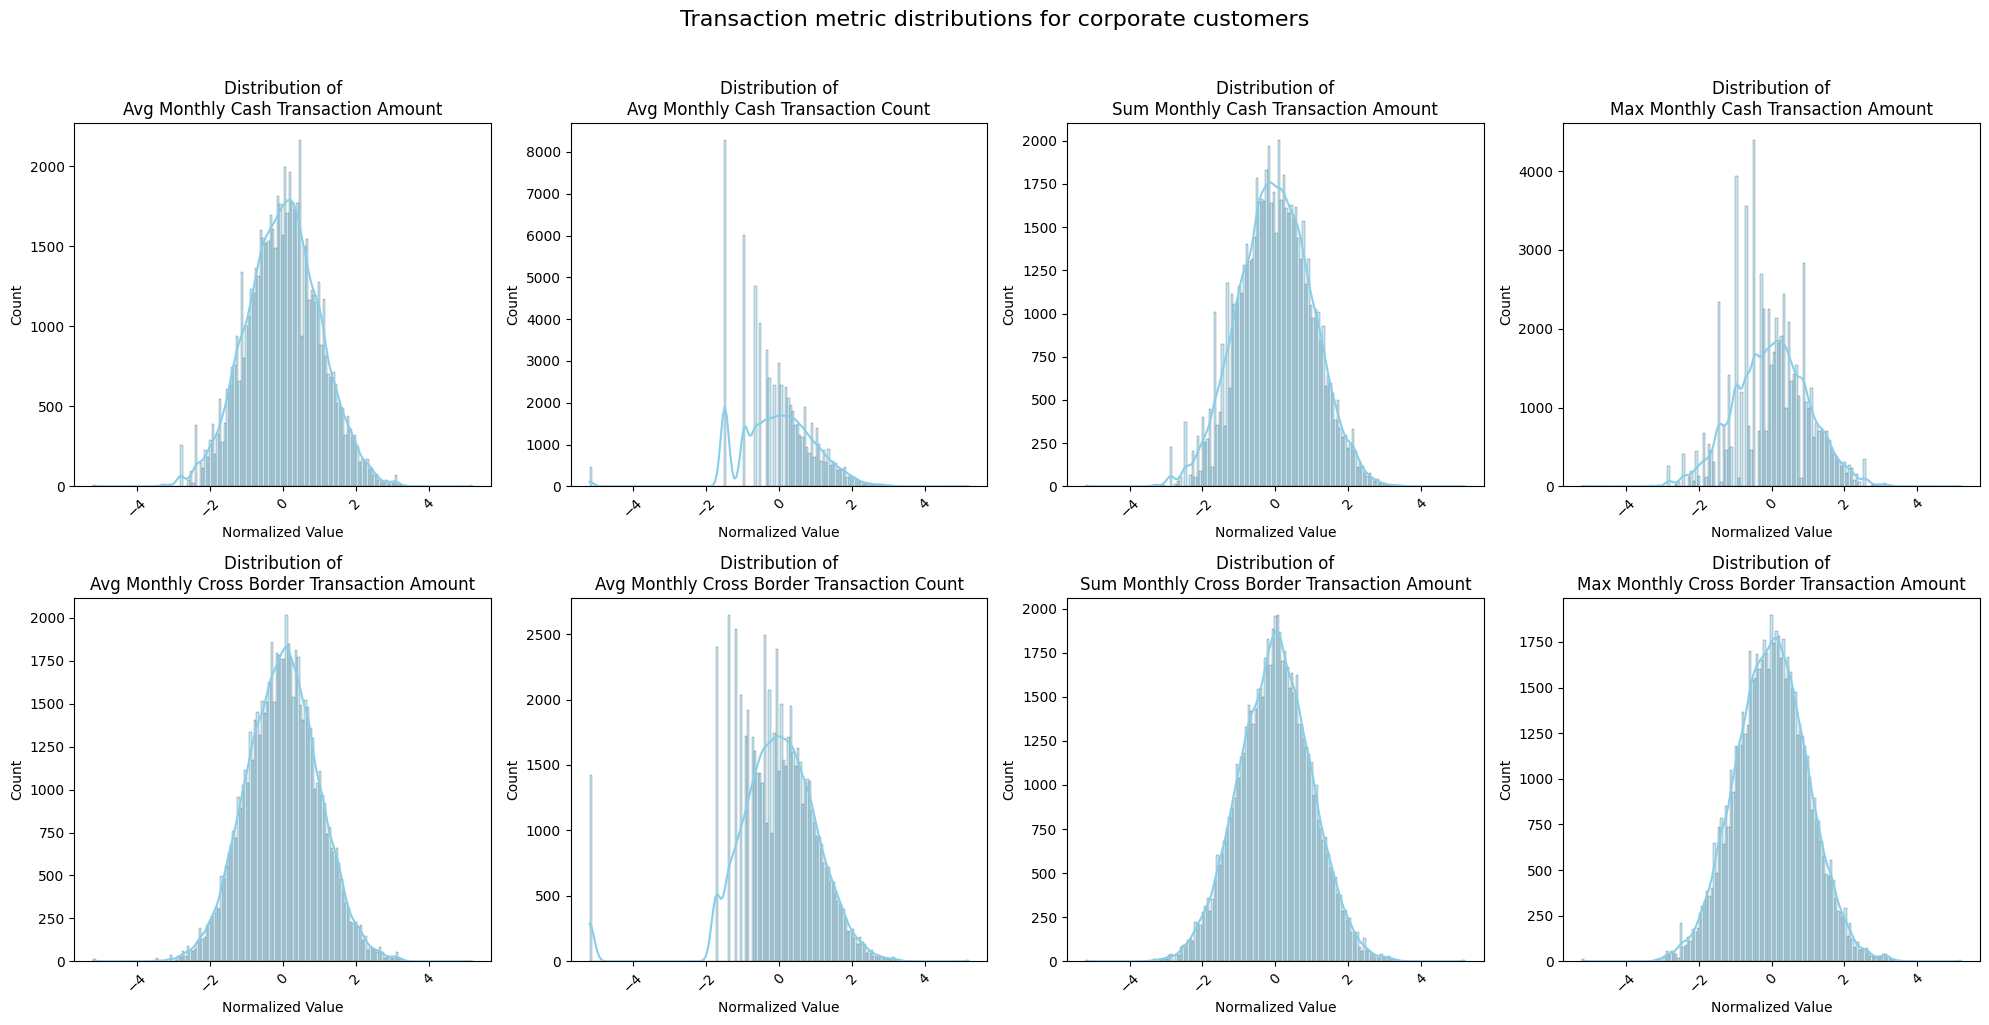


Summary Statistics for Transaction Metrics:
       avg_monthly_cash_transaction_amount  \
count                         67311.000000   
mean                              0.008562   
std                               1.014025   
min                              -5.199338   
25%                              -0.669430   
50%                               0.019114   
75%                               0.684763   
max                               5.199338   

       avg_monthly_cash_transaction_count  \
count                        67311.000000   
mean                            -0.018390   
std                              1.040761   
min                             -5.199338   
25%                             -0.676854   
50%                             -0.026349   
75%                              0.644086   
max                              5.199338   

       sum_monthly_cash_transaction_amount  \
count                         67311.000000   
mean                             -0.004948

In [ ]:
# Read the Excel file
df = pd.read_excel('/dataset.xlsx') # Update the file path as required

# Create a figure with 8 subplots (2 rows x 4 columns)
plt.style.use('default')
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Transaction metric distributions for corporate customers', fontsize=16, y=1.02)

# Dictionary mapping column letters to their descriptive names
# Plot corporate customer transaction metrics
columns_to_plot = {
    'E': 'avg_monthly_cash_transaction_amount',
    'F': 'avg_monthly_cash_transaction_count',
    'G': 'sum_monthly_cash_transaction_amount',
    'H': 'max_monthly_cash_transaction_amount',
    'I': 'avg_monthly_cross_border_transaction_amount',
    'J': 'avg_monthly_cross_border_transaction_count',
    'K': 'sum_monthly_cross_border_transaction_amount',
    'L': 'max_monthly_cross_border_transaction_amount'
}

# Create histograms
for idx, (col_letter, col_name) in enumerate(columns_to_plot.items()):
    row = idx // 4
    col = idx % 4

    # Create histogram with KDE
    sns.histplot(
        data=df,
        x=col_name,
        kde=True,
        ax=axes[row, col],
        color='skyblue',
        edgecolor='black'
    )

    # Customize the plot
    axes[row, col].set_title(f'Distribution of\n{col_name.replace("_", " ").title()}')
    axes[row, col].set_xlabel('Normalized Value')
    axes[row, col].set_ylabel('Count')

    # Rotate x-axis labels for better readability
    axes[row, col].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print summary statistics
print("\nSummary Statistics for Transaction Metrics:")
print(df[list(columns_to_plot.values())].describe())